<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/sk02RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Regresion lineal simple
#### Reduccion de los solidos y de la demanda de oxigeno quimico

$ y = b_0 + b_1x $

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
datos = pd.read_csv("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/salary_data.csv")

In [7]:
datos

,Unnamed: 0,YearsExperience,Salary
0,0,1.1,39343.0
1,1,1.3,46205.0
2,2,1.5,37731.0
3,3,2.0,43525.0
4,4,2.2,39891.0
5,5,2.9,56642.0
6,6,3.0,60150.0
7,7,3.2,54445.0
8,8,3.2,64445.0
9,9,3.7,57189.0


In [10]:
datos.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
x = datos[["YearsExperience"]]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [13]:
y = datos[["Salary"]]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


## graficar

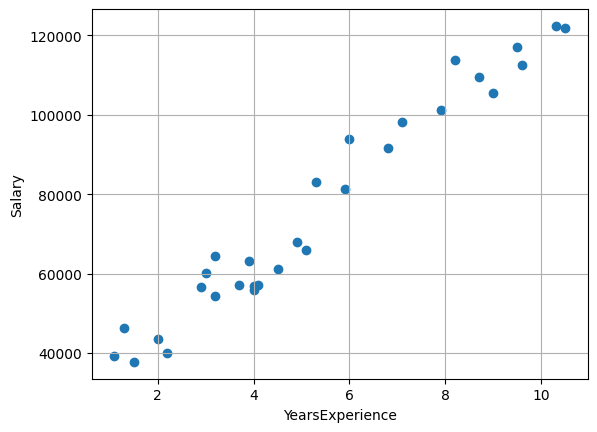

In [14]:
plt.scatter(x,y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid()
plt.show()

## convertir dataframe a numpy

In [15]:
matriz = datos.to_numpy()
matriz

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [16]:
n = len(matriz)
sumatoria_x = np.sum(matriz[:,0])
sumatoria_y = np.sum(matriz[:,1])
sumatoria_producto = np.sum(matriz[:,0] * matriz[:,1])
sumatoria_cuadrado_x = np.sum(matriz[:,0] * matriz[:,0])

print("n:", n)
print("sumatoria x:", sumatoria_x)
print("sumatoria y:", sumatoria_y)
print("sumatoria xy:", sumatoria_producto)
print("sumatoria x^2:", sumatoria_cuadrado_x)

n: 30
sumatoria x: 159.4
sumatoria y: 2280090.0
sumatoria xy: 14321961.0
sumatoria x^2: 1080.5


In [17]:
b1 = (n*sumatoria_producto - sumatoria_x*sumatoria_y) / (n*sumatoria_cuadrado_x - sumatoria_x*sumatoria_x)
b0 = (sumatoria_y - b1*sumatoria_x) / n

print("b1:", b1)
print("b0:", b0)

b1: 9449.962321455077
b0: 25792.200198668685


## scikit-learn

In [18]:
clf = LinearRegression()

In [19]:
clf.fit(x,y)

LinearRegression()

In [30]:
y_pred = clf.predict(x)

In [20]:
clf.coef_

array([[9449.96232146]])

In [21]:
clf.intercept_

array([25792.20019867])

In [22]:
clf.predict([[7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[91941.93644885]])

In [23]:
clf.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[970788.43234418]])

In [24]:
predicciones = clf.predict(x)

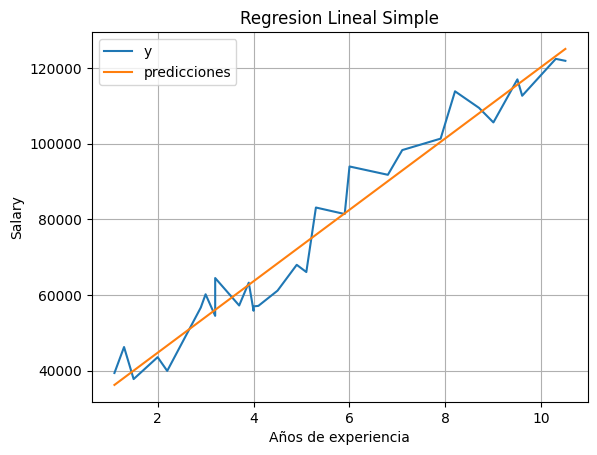

In [26]:
plt.plot(x, y)
plt.plot(x, predicciones)
plt.title("Regresion Lineal Simple")
plt.xlabel("Años de experiencia")
plt.ylabel("Salary")
plt.legend(["y", "predicciones"])
plt.grid()
plt.show()

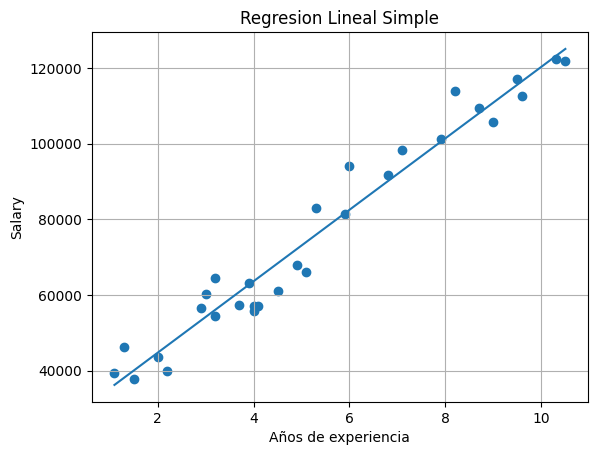

In [27]:
plt.scatter(x,y)
plt.plot(x, predicciones)
plt.title("Regresion Lineal Simple")
plt.xlabel("Años de experiencia")
plt.ylabel("Salary")
plt.grid()
plt.show()

$ y = 25792 + 0.9x $

In [28]:
mean_squared_error(y, predicciones)

31270951.722280964

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()

In [47]:
regressor.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(x_test)

In [49]:
y_pred

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [50]:
y_test

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0
9,57189.0


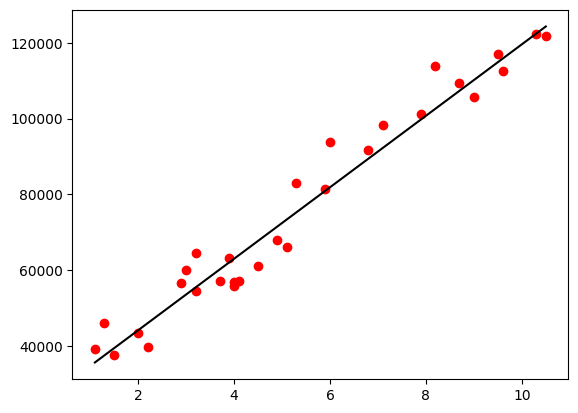

In [51]:
plt.scatter(x,y,color='r')
plt.plot(x,regressor.predict(x),color='black')

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures (degree=2)
x_poly = poly.fit_transform(x)

In [52]:
regressor.fit(x_poly,y)

LinearRegression()

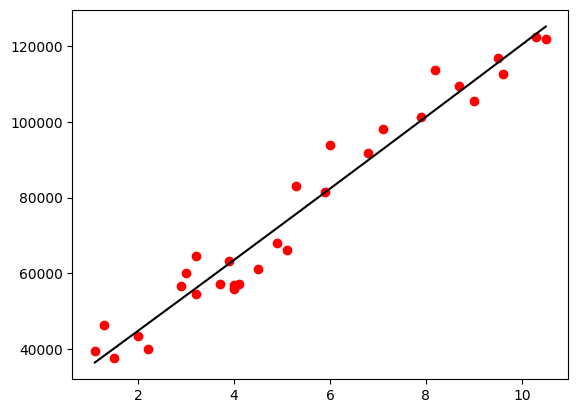

In [53]:
plt.scatter(x,y,color='r')
plt.plot(x,regressor.predict(x_poly),color='black')

In [54]:
y_pred = regressor.predict(x_poly)

In [55]:
y_pred

array([[ 36419.97995933],
       [ 38279.7051688 ],
       [ 40140.74178358],
       [ 44799.07071874],
       [ 46664.69725209],
       [ 53204.7174356 ],
       [ 54140.31743855],
       [ 56012.50099842],
       [ 56012.50099842],
       [ 60698.69729633],
       [ 62575.47077478],
       [ 63514.34929099],
       [ 63514.34929099],
       [ 64453.55565853],
       [ 68213.65964195],
       [ 71979.00924659],
       [ 73863.65115687],
       [ 75749.60447246],
       [ 81415.33285105],
       [ 82360.76839379],
       [ 89936.05538347],
       [ 92782.19755149],
       [100386.33545789],
       [103243.29671968],
       [108011.45584918],
       [110876.2855428 ],
       [115657.55872536],
       [116614.79691585],
       [123324.64408643],
       [125244.69393997]])

In [56]:
from sklearn import metrics
import numpy as np

print('MAE:',metrics.mean_absolute_error(y, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))
print('Average Cost:',y.mean())
print('R-Squared',metrics.r2_score(y,y_pred))

MAE: 4653.069044746811
RMSE: 5590.841479683288
Average Cost: Salary    76003.0
dtype: float64
R-Squared 0.956975168321065
